In [1]:
# ANOVA (analysis of variance) and Tukey's test

In [3]:
from scipy import stats

# Sample data: test scores of three student groups
group_A = [80, 85, 100]
group_B = [70, 75, 65]
group_C = [90, 95, 115]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group_A, group_B, group_C)

# Display ANOVA results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 6.6756756756756745
p-value: 0.02980710904795691


In [5]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare data for Tukey's test
data = {
    'score': [
        80, 85, 100,   # Group A
        70, 75, 65,    # Group B
        90, 95, 115    # Group C
    ],
    'group': [
        'A', 'A', 'A',
        'B', 'B', 'B',
        'C', 'C', 'C'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)
print(df)

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.05)

# Display Tukey results
print(tukey_result)

   score group
0     80     A
1     85     A
2    100     A
3     70     B
4     75     B
5     65     B
6     90     C
7     95     C
8    115     C
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B -18.3333 0.1469 -43.7313  7.0646  False
     A      C  11.6667 0.3944 -13.7313 37.0646  False
     B      C     30.0 0.0257   4.6021 55.3979   True
-----------------------------------------------------


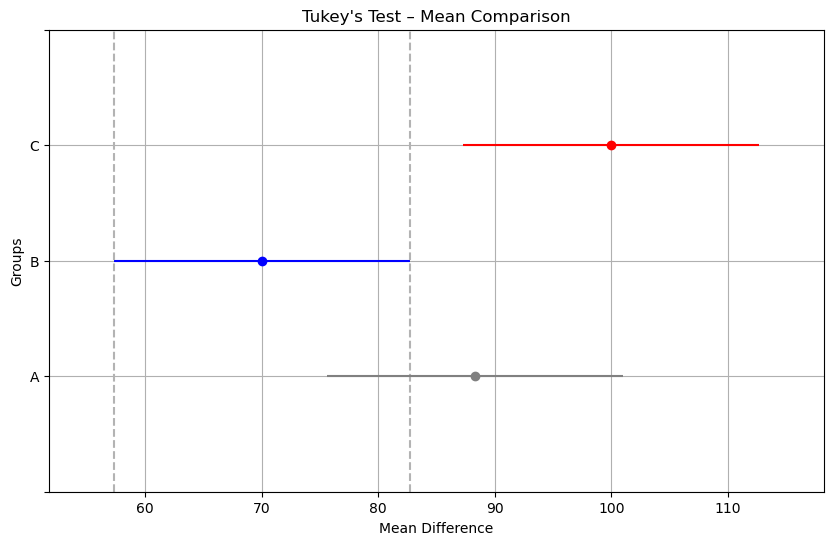

In [7]:
import matplotlib.pyplot as plt

# Plot the Tukey test result
tukey_result.plot_simultaneous(comparison_name='B')  # Can be 'A', 'B', or 'C' as the reference
plt.title("Tukey's Test – Mean Comparison")
plt.xlabel("Mean Difference")
plt.ylabel("Groups")
plt.grid(True)
plt.show()